In [25]:
import importlib
import Regression
importlib.reload(Regression)

<module 'Regression' from '/Users/rohankotwani/Documents/MachineLearning/Regression.py'>

In [2]:
import pandas as pd
import numpy as np

dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':float, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

train = pd.read_csv("DATA/wk3_kc_house_train_data.csv",dtype=dtype_dict)
valid = pd.read_csv("DATA/wk3_kc_house_valid_data.csv",dtype=dtype_dict)
test = pd.read_csv("DATA/wk3_kc_house_test_data.csv",dtype=dtype_dict)

import heapq
def heapsort(iterable):
    h = []
    for value in iterable:
        heapq.heappush(h, value)
    return [heapq.heappop(h) for i in range(len(h))]

### Polynomial Regression

In [3]:
heap = []
for i in range(1,15):
    z=Regression.sklearn_poly_regression(train[['sqft_living']],train[['price']],i)
    SSE = Regression.numpy_poly_regression_SSE(valid[['sqft_living']],valid[['price']],i,z)
    heap.append((SSE,i))
heapsort(heap)

[(566268593826074.62, 6),
 (623955062706518.0, 2),
 (625820280251531.0, 3),
 (628240679314405.38, 5),
 (629097886299585.75, 1),
 (629987341468500.38, 4),
 (1073845577333068.5, 7),
 (7087743224421379.0, 8),
 (45303627731005880.0, 9),
 (2.4756831332531533e+17, 10),
 (7.6162300212284147e+17, 13),
 (1.1937555950312881e+18, 11),
 (2.2975609250540692e+18, 14),
 (5.1108132744530401e+18, 12)]

### Vanilla Gradient Descent

In [4]:
X = train[['sqft_living']]
y = train[["price"]]

init_w = np.array([-47000., 1.]).reshape((2,1))
w,cost,converged = Regression.vanilla_gradient_descent(X, y, iters=1000, threshold=2.5e9, alpha=7e-12, w= init_w)
print(w,cost,converged)

[[-46999.91969552]
 [   202.3576993 ]] 53434961635.5 False


### Polynomial Ridge Regression

In [5]:
sales = pd.read_csv('DATA/kc_house_data.csv', dtype=dtype_dict)

In [6]:
Regression.sklearn_ridge_poly_regression(sales[['sqft_living']],sales[['price']],degree=15,L2_penalty=1.5e-5)

array([[  2.20664375e+05],
       [  1.24873306e+02],
       [ -4.77376011e-02],
       [  3.01446238e-05],
       [ -2.44419942e-09],
       [ -1.94153675e-13],
       [  8.54085686e-18],
       [  1.51142121e-21],
       [  8.27979093e-26],
       [  6.52603101e-31],
       [ -3.27895017e-34],
       [ -3.87962315e-38],
       [ -2.72437650e-42],
       [ -1.07790800e-46],
       [  3.78242694e-51],
       [  1.39790296e-54]])

### Polynomial Ridge Regression - K Fold Cross Validation - Choose L2 Penalty

In [7]:
train_valid_shuffled = pd.read_csv('DATA/wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('DATA/wk3_kc_house_test_data.csv', dtype=dtype_dict)

X = Regression.pandas_poly_feature(train_valid_shuffled[['sqft_living']], 15)
y = train_valid_shuffled[['price']]

heap=[]
for penalty in np.logspace(3, 9, num=13):
    SSE = Regression.sklearn_ridge_k_fold(k=10, l2_penalty=penalty, input_space = X, output = y)
    heap.append((SSE,penalty))
heapsort(heap)

[(264991451592249.59, 1000.0),
 (265539188591410.62, 3162.2776601683795),
 (265885331710459.28, 10000.0),
 (265995395009836.66, 31622.776601683792),
 (266030260837924.94, 100000.0),
 (266041292470320.66, 316227.76601683791),
 (266044781588172.44, 1000000.0),
 (266045885005068.28, 3162277.6601683795),
 (266046233942223.84, 10000000.0),
 (266046344286450.69, 31622776.601683792),
 (266046379180419.94, 100000000.0),
 (266046390214868.0, 316227766.01683795),
 (266046393704267.44, 1000000000.0)]

### Ridge Regression - Gradient Descent

In [8]:

train = pd.read_csv('DATA/kc_house_train_data.csv', dtype=dtype_dict)
test = pd.read_csv('DATA/kc_house_test_data.csv', dtype=dtype_dict)
simple_weights_0_penalty,_,_,_=Regression.ridge_gradient_descent(train[['sqft_living']].values, train[['price']], init_w=None, 
                                 alpha=1e-12,l2_penalty=0, max_iterations=1000)
simple_weights_high_penalty,_,_,_=Regression.ridge_gradient_descent(train[['sqft_living']], train[['price']], init_w=None,
                                 alpha=1e-12,l2_penalty=1e11, max_iterations=1000)


/Users/rohankotwani/anaconda/envs/datasci/lib/python3.5/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


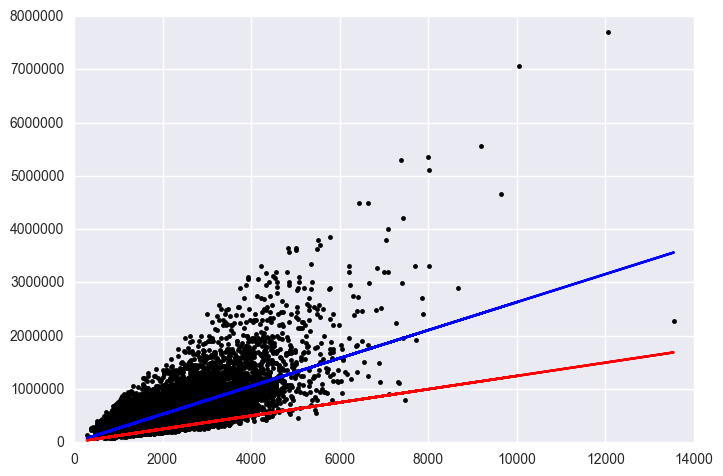

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.plt.plot(train[['sqft_living']].values,train[['price']].values,'k.',
        train[['sqft_living']].values,Regression.numpy_predict(train[['sqft_living']],simple_weights_0_penalty),'b-',
        train[['sqft_living']].values,Regression.numpy_predict(train[['sqft_living']],simple_weights_high_penalty),'r-')
plt.show()
plt.close()

### Lasso Regression - Choose L1 Penalty

In [10]:
from math import log, sqrt

training = pd.read_csv('DATA/wk3_kc_house_train_data.csv', dtype=dtype_dict)
validation = pd.read_csv('DATA/wk3_kc_house_valid_data.csv', dtype=dtype_dict)

In [11]:
training['sqft_living_sqrt'] = training['sqft_living'].apply(sqrt)
training['sqft_lot_sqrt'] = training['sqft_lot'].apply(sqrt)
training['bedrooms_square'] = training['bedrooms']*training['bedrooms']
training['floors_square'] = training['floors']*training['floors']

validation['sqft_living_sqrt'] = validation['sqft_living'].apply(sqrt)
validation['sqft_lot_sqrt'] = validation['sqft_lot'].apply(sqrt)
validation['bedrooms_square'] = validation['bedrooms']*validation['bedrooms']
validation['floors_square'] = validation['floors']*validation['floors']

In [12]:
all_features = ['bedrooms', 'bedrooms_square',
            'bathrooms',
            'sqft_living', 'sqft_living_sqrt',
            'sqft_lot', 'sqft_lot_sqrt',
            'floors', 'floors_square',
            'waterfront', 'view', 'condition', 'grade',
            'sqft_above',
            'sqft_basement',
            'yr_built', 'yr_renovated']

selection = Regression.sklearn_lasso_feature_selection(training[all_features],training[['price']],l1_penalty=5e2)
sales[selection].head()

,sqft_living,waterfront,view,grade,yr_built
0,1180.0,0,0,7,1955
1,2570.0,0,0,7,1951
2,770.0,0,0,6,1933
3,1960.0,0,0,7,1965
4,1680.0,0,0,8,1987


In [13]:

Regression.sklearn_lasso_regression(X,y,l1_penalty=5e2)

heap=[]
for l1_penalty in np.logspace(1, 7, num=13):
    z = Regression.sklearn_lasso_regression(training[all_features],training[['price']],l1_penalty)
    SSE = Regression.numpy_SSE(validation[all_features],validation[['price']],z)
    heap.append((SSE,l1_penalty))
    
heapsort(heap)

[(398213327300134.88, 10.0),
 (399041900253347.0, 31.622776601683793),
 (429791604072559.56, 100.0),
 (463739831045121.38, 316.22776601683796),
 (645898733633807.0, 1000.0),
 (1222506859427163.0, 3162.2776601683795),
 (1222506859427163.0, 10000.0),
 (1222506859427163.0, 31622.776601683792),
 (1222506859427163.0, 100000.0),
 (1222506859427163.0, 316227.76601683791),
 (1222506859427163.0, 1000000.0),
 (1222506859427163.0, 3162277.6601683795),
 (1222506859427163.0, 10000000.0)]

### Lasso Regression - Get Penalty Range

In [14]:
Regression.sklearn_lasso_penalty_range(training[all_features], training[['price']], num=7)

(153.78620557013164, 206.12848615851479)

### KNN regression - Choose K

In [15]:
train = pd.read_csv("DATA/kc_house_data_small_train.csv")
test = pd.read_csv("DATA/kc_house_data_small_test.csv")
validation = pd.read_csv("DATA/kc_house_data_validation.csv")
features=train.columns[(train.columns!='price')&(train.columns!='date')&(train.columns!='id')]

In [16]:
heap=[]

for k in range(1,16):
    predictions = Regression.numpy_knn_regression(k,train[features], train[['price']], validation[features])
    SSE = np.sum((validation.price - predictions)**2)
    heap.append((SSE,k))
Regression.heapsort(heap)

[(67361678735491.5, 8),
 (68338314418622.531, 7),
 (68372727958976.094, 9),
 (68903104922017.641, 6),
 (69050514340718.391, 12),
 (69333557981587.992, 10),
 (69523855215598.828, 11),
 (69846517419718.602, 5),
 (70011254508263.688, 13),
 (70911530680258.844, 14),
 (71108797486656.281, 15),
 (71934803349591.688, 4),
 (72692096019202.562, 3),
 (83445073504025.5, 2),
 (105451197751561.0, 1)]

### Gaussian Kernel Regression - Choose K & B

In [22]:
heap=[]
for k in range(1,16):
    for b in np.linspace(0.01,0.9,16):
        predictions = Regression.numpy_gaussian_kernel_regression(k,b,train[features], train[['price']], validation[features])
        SSE = np.sum((validation.price - predictions)**2)
        heap.append((SSE,b,k))
Regression.heapsort(heap)

[(63120157182714.844, 0.06933333333333333, 9),
 (63591441428473.297, 0.06933333333333333, 8),
 (63834590393153.719, 0.06933333333333333, 10),
 (64162383818952.273, 0.06933333333333333, 11),
 (64828066390168.484, 0.06933333333333333, 12),
 (64967835999588.211, 0.06933333333333333, 7),
 (65416323175709.203, 0.06933333333333333, 13),
 (65654840844454.297, 0.06933333333333333, 14),
 (65814063645579.656, 0.12866666666666668, 9),
 (65920430972726.023, 0.06933333333333333, 15),
 (66262274457003.875, 0.12866666666666668, 10),
 (66387912626907.453, 0.12866666666666668, 8),
 (66612343807296.758, 0.06933333333333333, 6),
 (66861963454357.43, 0.12866666666666668, 11),
 (67229060559788.531, 0.12866666666666668, 7),
 (67938906957667.516, 0.12866666666666668, 12),
 (68070113348132.594, 0.06933333333333333, 5),
 (68409066673834.609, 0.12866666666666668, 13),
 (68498093513983.125, 0.12866666666666668, 14),
 (68650236098431.438, 0.12866666666666668, 15),
 (68770026615140.312, 0.12866666666666668, 6),
 (

### Inverse Distance Kernel Regression - Choose K

In [26]:
heap=[]
for k in range(1,16):
    predictions = Regression.numpy_knn_weighted_regression(k,train[features], train[['price']], validation[features])
    SSE = np.sum((validation.price - predictions)**2)
    heap.append((SSE,k))
Regression.heapsort(heap)

[(66950195965431.109, 8),
 (67611010338949.328, 9),
 (67705607904796.75, 12),
 (67907048621089.789, 10),
 (67958635363273.805, 11),
 (67959958475323.359, 7),
 (68408956362761.438, 13),
 (68642904720638.234, 6),
 (69094056591556.734, 14),
 (69224109940019.086, 15),
 (69603710553541.398, 5),
 (71640084995991.656, 4),
 (72650261466114.094, 3),
 (83482557450944.938, 2),
 (105451197751561.0, 1)]